<a href="https://colab.research.google.com/github/pedro-kaneko/superstore-modelo-de-mitigacao-de-prejuizos/blob/main/superstore_modelo_de_mitigacao_de_prejuizos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução

Neste notebook exploramos o conjunto de dados "Superstore", que contém informações detalhadas sobre as transações de um e-commerce que vende produtos de tecnologia, mobília e material de escritório. Este dataset é uma ferramenta útil para analisar o desempenho de vendas e desenvolver soluções para otimizar a rentabilidade da empresa.

## Objetivo

O objetivo principal deste notebook é realizar uma análise abrangente dos dados de vendas para identificar problemas e oportunidades de melhoria. Utilizaremos técnicas de Machine Learning para desenvolver um modelo preditivo que estime a margem de lucro dos produtos antes de serem anunciados, com o intuito de mitigar prejuízos associados a descontos excessivos. Além disso, o notebook fornecerá instruções sobre como testar a eficácia do modelo em um ambiente de produção.

## Atributos do Conjunto de Dados

O conjunto de dados "Superstore" inclui os seguintes atributos:

- **Row_ID**: Identificador único para cada linha de transação.
- **Order_ID**: Identificador único para cada pedido.
- **Order_Date**: Data em que o pedido foi realizado.
- **Ship_Date**: Data em que o pedido foi enviado.
- **Tipo_de_Frete**: Tipo de frete utilizado para envio do pedido.
- **Customer_ID**: Identificador único para cada cliente.
- **Nome_do_Cliente**: Nome do cliente que realizou o pedido.
- **Segment**: Segmento de mercado do cliente (Consumidor, Corporativo, Home-Office).
- **Country**: País de origem do pedido (neste caso, sempre Estados Unidos).
- **City**: Cidade de origem do pedido.
- **State**: Estado de origem do pedido.
- **Postal_Code**: Código postal de origem do pedido.
- **Region**: Região de origem do pedido (Oeste, Leste, Central, Sul).
- **Product_ID**: Identificador único para cada produto.
- **Category**: Categoria do produto (Tecnologia, Mobília, Material de Escritório).
- **Sub_Category**: Subcategoria do produto (por exemplo, Telefones, Cadeiras, Papel).
- **Product_Name**: Nome do produto.
- **Sales**: Valor total das vendas para o pedido.
- **Quantity**: Quantidade de produtos vendidos.
- **Discount**: Percentual de desconto aplicado no pedido.
- **Profit**: Lucro obtido com o pedido após aplicar custos e descontos.

## Resumo da Análise

1. **Exploração e Limpeza de Dados**:
   - Entender a estrutura do conjunto de dados e realizar a limpeza necessária para garantir a qualidade dos dados.

2. **Análise Descritiva e Diagnóstica**:
   - Examinar o desempenho de vendas e lucro, identificar padrões e problemas, como descontos excessivos e políticas de preços inadequadas.

3. **Desenvolvimento de Modelo de Machine Learning**:
   - Criar um modelo preditivo para estimar a margem de lucro dos produtos antes de serem anunciados, com base em atributos como preço, desconto, categoria e região.

4. **Validação e Teste do Modelo**:
   - Avaliar a eficácia do modelo e verificar sua consistência ao aplicá-lo a novos conjuntos de dados, garantindo previsões robustas e confiáveis.

5. **Planejamento de Experimento (RCT)**:
   - Para garantir que o modelo funcione bem em um ambiente de produção, será realizado um planejamento de Teste Randomizado Controlado (RCT).

6. **Validação de Experimento (Teste de Fisher)**:
   - Simularemos os resultados do experimento e aplicaremos o Teste de Fisher para determinar se as diferenças observadas entre os grupos são estatisticamente significativas.

Este notebook utiliza bibliotecas como Pandas, Numpy, Scikit-learn, Matplotlib e Plotly para análise de dados, visualização e modelagem preditiva. Ao final, esperamos identificar estratégias para melhorar a rentabilidade da empresa, minimizando transações que geram prejuízos e oferecendo recursos práticos para testar e validar a proposta em um ambiente de produção.


# Sumário
- [Bibliotecas e Versões](#1)
- [Carregando a base de dados](#2)
- [Análise exploratória de dados](#3)
  - [Resumo estatístico](#4)
  - [Correlação](#5)
  - [Análise bivariada](#6)
    - [Lucro x desconto](#7)
    - [Margem de lucro x desconto](#8)
  - [Volume de transações e produtos vendidos](#9)
    - [Produtos](#10)
    - [Transações](#11)
  - [Vendas, Lucro e Margem de Lucro](#12)
    - [Anual](#13)
    - [Mensal](#14)
  - [Lucro Bruto, Lucro Líquido e Prejuízo](#15)
    - [Total](#16)
    - [Anual](#17)
    - [Mensal](#18)
  - [Períodos específicos de prejuízos](#19)
    - [Janeiro de 2015](#20)
    - [Novembro de 2016](#21)
    - [2° Semestre de 2017](#22)
    - [Lista dos produtos que mais geraram prejuízos](#23)
  - [Lucro e Prejuízo por faixa de desconto](#24)
    - [Lucro e Prejuízo Total](#25)
    - [Lucro e Prejuízo Anual](#26)
    - [Lucro e Prejuízo Mensal](#27)
    - [Volume de produtos vendidos por faixa de desconto e ano](#28)
  - [Segmentação](#29)
- [Machine-Learning: Modelo de Previsão](#30)
  - [Modelagem Preditiva](#31)
    - [Preparação dos dados](#32)
    - [Pré-processamento](#33)
    - [Treinamento](#34)
      - [Features Importance](#35)
    - [Validação](#36)
      - [Visualizando as Previsões](#37)
      - [Avaliação de Desempenho](#38)
    - [Teste](#39)
    - [Indicador de Risco](#40)
      - [Conclusão](#41)
    - [Métricas de performance](#42)
  - [Implementação do Modelo](#43)
- [Impacto da implementação do algoritmo](#44)
  - [Como o algoritmo pode impactar no futuro](#45)
- [Planejamento e Validação de Experimentos](#46)
  - [Cálculo da Amostra para RCT (Randomized Controlled Trial)](#47)
  - [Análise Estatística dos Resultados](#48)
-[Conclusão](#49)
- [Fim](#46)

# Bibliotecas e Versões
<a name="1"></a>

In [1]:
# importações básicas
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import plotly.graph_objects as go

# importações para modelo de regressão
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, precision_score, mean_squared_error, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

# importaçãoes para experimento RCT e teste estatístico
import math
from scipy.stats import norm, fisher_exact
import scipy

In [2]:
# Versões das bibliotecas
print(f"python: {sys.version}")
print(f"pandas: {pd.__version__}")
print(f"numpy: {np.__version__}")
print(f"matplotlib: {plt.matplotlib.__version__}")
print(f"plotly: {plotly.__version__}")
print(f"scikit-learn: {sklearn.__version__}")
print(f"scipy: {scipy.__version__}")

python: 3.10.12 (main, Jul 29 2024, 16:56:48) [GCC 11.4.0]
pandas: 2.1.4
numpy: 1.26.4
matplotlib: 3.7.1
plotly: 5.15.0
scikit-learn: 1.3.2
scipy: 1.13.1


In [3]:
# Configurações globais Pandas

# Configuração global para separadores de milhar em números flutuantes
pd.options.display.float_format = '{:,.2f}'.format

# Mostrar todas as colunas
pd.set_option('display.max_columns', None)

# Carregando a base de dados
<a name="2"></a>

In [4]:
# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Definir o caminho do arquivo
path_superstore = '/content/drive/MyDrive/Colab_Notebooks/Superstore/DadosSuperstore2-230321-143628.xlsx'

# Ler arquivos excel
df = pd.read_excel(path_superstore)

df

,Row ID,Order ID,Order Date,Ship Date,Tipo de Frete,Customer ID,Nome do Cliente,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.00,41.91
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.00,219.58
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.00,6.87
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58,5,0.45,-383.03
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.37,2,0.20,2.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.25,3,0.20,4.10
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.96,2,0.00,15.63
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.58,2,0.20,19.39
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.60,4,0.00,13.32


Compreensão do conjunto de dados

- Uma única linha no conjunto de dados representa uma transação de um produto específico com informações sobre quantidade, valor da venda e do lucro.
- Um pedido (Order_ID), representa um conjunto de transações.

In [6]:
# Renomeando as colunas (removendo o espaço das colunas para facilitar a manipulação)
new_cols = [(iten).replace(' ', '_').replace('-','_') for iten in df.columns]
df.columns = new_cols
df.columns

Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Tipo_de_Frete',
       'Customer_ID', 'Nome_do_Cliente', 'Segment', 'Country', 'City', 'State',
       'Postal_Code', 'Region', 'Product_ID', 'Category', 'Sub_Category',
       'Product_Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [7]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [8]:
df['Sub_Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [9]:
# Ordenando por data do pedido
df.sort_values(by='Order_Date', ascending=False, inplace=True)
df.reset_index(drop=True, inplace=True)
df

,Row_ID,Order_ID,Order_Date,Ship_Date,Tipo_de_Frete,Customer_ID,Nome_do_Cliente,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit
0,907,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,New York,10009,East,FUR-BO-10003441,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Fully Ass...",323.14,4,0.20,12.12
1,908,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,New York,10009,East,TEC-PH-10004774,Technology,Phones,Gear Head AU3700S Headset,90.93,7,0.00,2.73
2,1297,CA-2017-115427,2017-12-30,2018-01-03,Standard Class,EB-13975,Erica Bern,Corporate,United States,Fairfield,California,94533,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.90,2,0.20,4.52
3,1298,CA-2017-115427,2017-12-30,2018-01-03,Standard Class,EB-13975,Erica Bern,Corporate,United States,Fairfield,California,94533,West,OFF-BI-10004632,Office Supplies,Binders,GBC Binding covers,20.72,2,0.20,6.47
4,646,CA-2017-126221,2017-12-30,2018-01-05,Standard Class,CC-12430,Chuck Clark,Home Office,United States,Columbus,Indiana,47201,Central,OFF-AP-10002457,Office Supplies,Appliances,Eureka The Boss Plus 12-Amp Hard Box Upright V...,209.30,2,0.00,56.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,1760,CA-2014-141817,2014-01-05,2014-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,Pennsylvania,19143,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.54,3,0.20,4.88
9990,742,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.54,2,0.80,-5.49
9991,740,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.78,3,0.20,4.27
9992,741,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.74,3,0.20,-64.77


In [10]:
# Checando o tipo dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Row_ID           9994 non-null   int64         
 1   Order_ID         9994 non-null   object        
 2   Order_Date       9994 non-null   datetime64[ns]
 3   Ship_Date        9994 non-null   datetime64[ns]
 4   Tipo_de_Frete    9994 non-null   object        
 5   Customer_ID      9994 non-null   object        
 6   Nome_do_Cliente  9994 non-null   object        
 7   Segment          9994 non-null   object        
 8   Country          9994 non-null   object        
 9   City             9994 non-null   object        
 10  State            9994 non-null   object        
 11  Postal_Code      9994 non-null   int64         
 12  Region           9994 non-null   object        
 13  Product_ID       9994 non-null   object        
 14  Category         9994 non-null   object 

# Analise exploratoria de dados
<a name="3"></a>

## Resumo estatístico
<a name="4"></a>

In [11]:
df.describe()

,Row_ID,Order_Date,Ship_Date,Postal_Code,Sales,Quantity,Discount,Profit
count,"9,994.00",9994,9994,"9,994.00","9,994.00","9,994.00","9,994.00","9,994.00"
mean,"4,997.50",2016-04-30 00:07:12.259355392,2016-05-03 23:06:58.571142912,"55,190.38",229.86,3.79,0.16,28.66
min,1.00,2014-01-03 00:00:00,2014-01-07 00:00:00,"1,040.00",0.44,1.00,0.00,"-6,599.98"
25%,"2,499.25",2015-05-23 00:00:00,2015-05-27 00:00:00,"23,223.00",17.28,2.00,0.00,1.73
50%,"4,997.50",2016-06-26 00:00:00,2016-06-29 00:00:00,"56,430.50",54.49,3.00,0.20,8.67
75%,"7,495.75",2017-05-14 00:00:00,2017-05-18 00:00:00,"90,008.00",209.94,5.00,0.20,29.36
max,"9,994.00",2017-12-30 00:00:00,2018-01-05 00:00:00,"99,301.00","22,638.48",14.00,0.80,"8,399.98"
std,"2,885.16",NaN,NaN,"32,063.69",623.25,2.23,0.21,234.26


- **Profit**: possui valores negativos (prejuízo).
- **Discount**: possui pelo menos um valor máximo de 80% (muito alto).

## Correlação
<a name="5"></a>

In [12]:
df[['Sales', 'Quantity', 'Discount', 'Profit']].corr()

,Sales,Quantity,Discount,Profit
Sales,1.00,0.20,-0.03,0.48
Quantity,0.20,1.00,0.01,0.07
Discount,-0.03,0.01,1.00,-0.22
Profit,0.48,0.07,-0.22,1.00


- *Profit* e *Discount* tem uma correlação negativa -22% o que é esperado. Isso significa que à medida que um aumenta o outro tende diminuir, e vice-versa. No entanto, essa correlação não é muito forte, o que significa que a relação entre essas duas variáveis não é linear e pode ser influenciada por outros fatores.

## Análise bivariada
<a name="6"></a>

### Lucro x desconto
<a name="7"></a>

In [13]:
# Lucro versus desconto
fig = px.scatter(df, y='Discount', x='Profit', hover_name='Product_Name',
                 color=df['Profit'].apply(lambda x: 'prejuízo' if x <= 0 else 'lucro'),
                 marginal_x='histogram', marginal_y='histogram',
                 title='Lucro x desconto (pontos representam produtos)')

fig.update_layout(
    xaxis_title='Lucro',
    yaxis_title='Desconto',
    legend_title='Transação',
)

fig.show()

Há sérios problemas na formulação de preços dos produtos e desconto. No geral em todas as faixas de desconto ocorreram transações que geraram prejuízo (Inclusive para transações onde não houve desconto).

- Maiores descontos estão associados a maiores prejuízos.
- Maior lucro está associado a um menor desconto.
- Todas as transações realizadas com mais de 40% de desconto geraram prejuízos

### Margem de lucro x desconto
<a name="8"></a>

A seguir serão criados 2 atributos: *margem de lucro* e *valor do produto* importantes para seguir com a análise.

In [14]:
# Criando o atributo para margem de lucro
df['Margin'] = df['Profit'] / df['Sales']

# Criando o atributo para valor do produto
df['Product_Value'] = df['Sales'] / df['Quantity']

In [15]:
# Análise bivariada: Margem de lucro versus desconto por transação
fig = px.scatter(df, y='Discount', x='Margin', hover_name='Product_Name',
                 color=df['Margin'].apply(lambda x: 'prejuízo' if x <= 0 else 'lucro'),
                 marginal_x='histogram', marginal_y='histogram',
                 title='Margem de lucro versus desconto por transação (pontos representam produtos)')

fig.update_layout(
    xaxis_title='Margem de lucro',
    yaxis_title='Desconto',
    legend_title='Transação',
)

fig.show()

Existe um problema com a dedução de descontos sobre o preço dos produtos, o que na prática diminui a margem de lucro e até gera prejuízos.

- margem de lucro máxima: 50%
- margem de lucro mínima: -275%
- desconto máximo: 80%

## Volume de transações e produtos vendidos
<a name="9"></a>

Calculando o número de transações e o número de produtos vendidos que geraram lucro e prejuízo.

### Produtos
<a name="10"></a>

In [16]:
# Quantidade de produtos

total_products_Y = df.groupby(pd.Grouper(key='Order_Date', freq='YS'))['Quantity'].sum()
gain_products_Y = df.query('Profit > 0').groupby(pd.Grouper(key='Order_Date', freq='YS'))['Quantity'].sum()
loss_products_Y = df.query('Profit <= 0').groupby(pd.Grouper(key='Order_Date', freq='YS'))['Quantity'].sum()
loss_ratio_products_Y = (loss_products_Y / total_products_Y) * 100

products_count = pd.concat([total_products_Y, gain_products_Y, loss_products_Y, loss_ratio_products_Y], axis=1)
products_count.columns = ['Total', 'Lucro', 'Prejuízo', 'Percentual Prejuízo']
print('Quantidade de produtos vendidos')
products_count

Quantidade de produtos vendidos


,Total,Lucro,Prejuízo,Percentual Prejuízo
Order_Date,,,,
2014-01-01,7581,6096,1485,19.59
2015-01-01,7979,6403,1576,19.75
2016-01-01,9837,7953,1884,19.15
2017-01-01,12476,10126,2350,18.84


### Transações
<a name="11"></a>

In [17]:
# Quantidade de transações
total_transactions_Y = df.groupby(pd.Grouper(key='Order_Date', freq='YS'))['Profit'].count()
gain_transactions_Y = df.query('Profit > 0').groupby(pd.Grouper(key='Order_Date', freq='YS'))['Profit'].count()
loss_transactions_Y = df.query('Profit <= 0').groupby(pd.Grouper(key='Order_Date', freq='YS'))['Profit'].count()
loss_ratio_transactions_Y = (loss_transactions_Y / total_transactions_Y)
loss_ratio_transactions_Y = loss_ratio_transactions_Y.apply(lambda x: f'{x:.2%}')

transactions_count = pd.concat([total_transactions_Y, gain_transactions_Y, loss_transactions_Y, loss_ratio_transactions_Y], axis=1)
transactions_count.columns = ['# Transações Total', '# Transações Lucro', '# Transações Prejuízo', 'Percentual Prejuízo']
transactions_count.index = list(range(2014,2018))
transactions_count.index.name = 'Ano'
print('Quantidade de transações')
transactions_count.T

Quantidade de transações


Ano,2014,2015,2016,2017
# Transações Total,1993,2102,2587,3312
# Transações Lucro,1599,1696,2090,2673
# Transações Prejuízo,394,406,497,639
Percentual Prejuízo,19.77%,19.31%,19.21%,19.29%


## Vendas, Lucro e Margem de Lucro
<a name="12"></a>
Nesta etapa além de analisar as vendas o lucro e a margem de lucro também analisaremos como os prejuízos se desenvolveram ao longo do tempo.

### Anual
<a name="13"></a>

In [18]:
# Calculando a frequência das vendas e do lucro (D: Diaria, M: Mensal, S: Semestral, Y: Anual)

# Frequência Lucro
profit_D = df.groupby(pd.Grouper(key='Order_Date', freq='D'))['Profit'].sum() # 'D' day
profit_M = df.groupby(pd.Grouper(key='Order_Date', freq='MS'))['Profit'].sum() # 'MS' month start
profit_Y = df.groupby(pd.Grouper(key='Order_Date', freq='YS'))['Profit'].sum() # 'YS' year start

# Frequência Vendas
sales_D = df.groupby(pd.Grouper(key='Order_Date', freq='D'))['Sales'].sum()
sales_M = df.groupby(pd.Grouper(key='Order_Date', freq='MS'))['Sales'].sum()
sales_Y = df.groupby(pd.Grouper(key='Order_Date', freq='YS'))['Sales'].sum()

# Frequência Margem
margin_D = (profit_D / sales_D) * 100
margin_M = (profit_M / sales_M) * 100
margin_Y = (profit_Y / sales_Y) * 100

In [19]:
# Vendas, lucro e margem mensal (2014-2017)

fig = go.Figure()

# Trace for Vendas
fig.add_trace(
    go.Bar(
        y=sales_Y,
        x=sales_Y.index,
        name='Vendas',
    ))

# Trace for Lucro
fig.add_trace(
    go.Bar(
        y=profit_Y,
        x=profit_Y.index,
        name='Lucro',
    ))

# Trace for Margem with secondary y-axis
fig.add_trace(
    go.Scatter(
        y=margin_Y,
        x=margin_Y.index,
        name='Margem',
        yaxis='y2'
    ))

# Update layout to add secondary y-axis
fig.update_layout(
    title='Vendas, lucro e margem anual (2014-2017)',
    barmode='overlay',
    xaxis_title='Ano',
    yaxis_title='Valor Monetário',
    legend_title='Tipo de Lucro',
    yaxis2=dict(
        title='Margem (%)',
        overlaying='y',
        side='right',
        showgrid=False,
        zeroline=False
    )
)

fig.show()

In [20]:
sales_Y_pct_change = sales_Y.pct_change() * 100
profit_Y_pct_change = profit_Y.pct_change() * 100
anual_growth = pd.concat([sales_Y, sales_Y_pct_change, profit_Y, profit_Y_pct_change], axis=1)
anual_growth.columns = ['Vendas', 'Vendas(Crescimento %)', 'Lucro', 'Lucro(Crescimento %)']
anual_growth

,Vendas,Vendas(Crescimento %),Lucro,Lucro(Crescimento %)
Order_Date,,,,
2014-01-01,"484,247.50",NaN,"49,543.97",NaN
2015-01-01,"470,532.51",-2.83,"61,618.60",24.37
2016-01-01,"609,205.60",29.47,"81,795.17",32.74
2017-01-01,"733,215.26",20.36,"93,439.27",14.24


A tendência das vendas é de crescimento.
- Em 2015 o lucro aumentou apesar da ligeira queda nas vendas pois houve um aumento da margem de lucro.
- Em 2017 apesar das vendas terem aumentado o lucro não teve o mesmo crescimento Pois houve queda na margem de lucro.


### Mensal
<a name="14"></a>

In [21]:
# Vendas, lucro e margem mensal (2014-2017)

fig = go.Figure()

# Trace for Vendas
fig.add_trace(
    go.Bar(
        y=sales_M,
        x=sales_M.index,
        name='Vendas',
    ))

# Trace for Lucro
fig.add_trace(
    go.Bar(
        y=profit_M,
        x=profit_M.index,
        name='Lucro',
    ))

# Trace for Margem with secondary y-axis
fig.add_trace(
    go.Scatter(
        y=margin_M,
        x=margin_M.index,
        name='Margem',
        yaxis='y2'
    ))

# Update layout to add secondary y-axis
fig.update_layout(
    title='Vendas, lucro e margem mensal (2014-2017)',
    barmode='overlay',
    xaxis_title='Data',
    yaxis_title='Quantidade',
    legend_title='Transação',
    yaxis2=dict(
        title='Margem (%)',
        overlaying='y',
        side='right',
        showgrid=False,
        zeroline=False
    )
)

fig.show()

Existe sazonalidade anual para as vendas e lucro.

- Janeiro e Fevereiro é o período de baixa
- Março a Agosto aumentam as vendas.
- Setembro a dezembro correspondem ao período de alta.

Uma visão mais detalhada nos revela que:
- Não há consistência na margem de lucro.
- Há períodos onde as vendas são altas mas a margem de lucro é pequena.
- Julho de 2014 e Janeiro de 2015 foram os únicos meses a fechar no negativo com prejuízo de -841 e -3,281 respectivamente.
- No último semestre de 2017 as vendas dispararam atingindo sua máxima histórica em Novembro, porém o lucro não foi proporcional e não correspondeu com a alta das vendas pois houve queda da margem de lucro.


## Lucro Bruto, Lucro Líquido e Prejuízo
<a name="15"></a>

Faremos a decomposição dos dados de lucro em Lucro Bruto, Lucro Líquido e Prejuízo.

* **Lucro Bruto** é a soma de todas as transações lucrativas, ou seja, todas as transações com valores positivos.

* **Lucro Líquido** é o saldo final após considerar tanto o lucro quanto o prejuízo, ou seja, a soma de todas as transações, incluindo tanto as lucrativas quanto as que resultaram em prejuízo.

* **Prejuízo** é a soma das transações negativas (perdas) e representa a diferença entre o Lucro Bruto e o Lucro Líquido.

### Total
<a name="16"></a>

In [22]:
gross_profit = df.query('Profit > 0')['Profit'].sum()
loss = df.query('Profit <= 0')['Profit'].sum()
net_profit = df.Profit.sum()
loss_ratio = (loss / gross_profit)

profit_decomp = pd.DataFrame({'Lucro Bruto': gross_profit.astype(int),
                              'Lucro Líquido': net_profit.astype(int),
                              'Prejuízo': loss.astype(int),
                              'Percentual Prejuízo': round(loss_ratio * 100,2).astype(str) + '%'},
                             index=['Total'])

profit_decomp

,Lucro Bruto,Lucro Líquido,Prejuízo,Percentual Prejuízo
Total,442528,286397,-156131,-35.28%


### Anual
<a name="17"></a>

In [23]:
gross_profit_Y = df.query('Profit > 0').groupby(pd.Grouper(key='Order_Date', freq='YS'))['Profit'].sum()
loss_Y = df.query('Profit <= 0').groupby(pd.Grouper(key='Order_Date', freq='YS'))['Profit'].sum()
loss_ratio_Y = loss_Y / gross_profit_Y

profit_decomp_Y = pd.concat([gross_profit_Y.astype(int),
                             profit_Y.astype(int),
                             loss_Y.astype(int),
                             loss_ratio_Y.apply(lambda x: f'{x:.2%}')],
                            axis=1)

profit_decomp_Y.columns = ['Lucro Bruto', 'Lucro Líquido', 'Prejuízo', 'Percentual Prejuízo']
profit_decomp_Y.index = list(range(2014,2018))
profit_decomp_Y.index.name = 'Ano'
profit_decomp_Y.T

Ano,2014,2015,2016,2017
Lucro Bruto,81436,94147,119668,147275
Lucro Líquido,49543,61618,81795,93439
Prejuízo,-31892,-32529,-37872,-53836
Percentual Prejuízo,-39.16%,-34.55%,-31.65%,-36.55%


In [24]:
fig = go.Figure()

# Trace Lucro Bruto
fig.add_trace(
    go.Bar(
        y=gross_profit_Y,
        x=gross_profit_Y.index,
        name='Lucro Bruto',
    ))

# Trace Lucro Líquido
fig.add_trace(
    go.Bar(
        y=profit_Y,
        x=profit_Y.index,
        name='Lucro Líquido',
    ))

# Trace Prejuízo (secondary y-axis)
fig.add_trace(
    go.Scatter(
        y=loss_Y,
        x=loss_Y.index,
        name='Prejuízo',
        yaxis='y2',
    ))

# Update layout
fig.update_layout(
    title='Lucro bruto, lucro líquido e prejuízo (2014-2017)',
    barmode='group',
    xaxis_title='Ano',
    yaxis_title='Valor do Lucro',
    legend_title='Tipo de Lucro',
    yaxis2=dict(
        title='Valor do Prejuízo',
        overlaying='y',
        side='right',
        showgrid=False,
        zeroline=False
    )
)

fig.show()

### Mensal
<a name="18"></a>

In [25]:
gross_profit_M = df.query('Profit > 0').groupby(pd.Grouper(key='Order_Date', freq='MS'))['Profit'].sum()
loss_M = df.query('Profit <= 0').groupby(pd.Grouper(key='Order_Date', freq='MS'))['Profit'].sum()
loss_ratio_M = loss_M / gross_profit_M

profit_decomp_M = pd.concat([gross_profit_M.astype(int), profit_M.astype(int), loss_M.astype(int), loss_ratio_M.apply(lambda x: f'{x:.2%}')
], axis=1)
profit_decomp_M.columns = ['Lucro Bruto', 'Lucro Líquido', 'Prejuízo', 'Percentual Prejuízo']
# profit_decomp_M.index = list(range(2014,2018))
profit_decomp_M.index.name = 'Ano'
print('Lucro e Prejuízo anual')
profit_decomp_M.iloc[:5]

Lucro e Prejuízo anual


,Lucro Bruto,Lucro Líquido,Prejuízo,Percentual Prejuízo
Ano,,,,
2014-01-01,3105,2450,-655,-21.10%
2014-02-01,963,862,-101,-10.52%
2014-03-01,4936,498,-4437,-89.90%
2014-04-01,4411,3488,-922,-20.92%
2014-05-01,4496,2738,-1757,-39.09%


In [26]:
fig = go.Figure()

# Trace Lucro
fig.add_trace(
    go.Bar(
        y=gross_profit_M,
        x=gross_profit_M.index,
        name='Lucro Bruto',
    ))

# Trace Lucro pós Prejuízos
fig.add_trace(
    go.Bar(
        y=profit_M,
        x=profit_M.index,
        name='Lucro Líquido',
    ))

# Trace Prejuízo (secondary y-axis)
fig.add_trace(
    go.Scatter(
        y=loss_M,
        x=loss_M.index,
        name='Prejuízo',
        yaxis='y2',
    ))

# Update layout
fig.update_layout(
    title='Lucro bruto, lucro líquido e prejuízo (2014-2017)',
    barmode='group',
    xaxis_title='Data',
    yaxis_title='Valor do Lucro (em unidades monetárias)',
    legend_title='Tipo de Lucro',
    yaxis2=dict(
        title='Prejuízo',
        overlaying='y',
        side='right',
        showgrid=False,
        zeroline=False
    ))

# Adicionar anotação para novembro de 2017
fig.add_annotation(
    x='2017-11-01',
    y=0,
    text="intensificação dos prejuízos",
    showarrow=True,
    arrowhead=2,
    ax=-100,
    ay=30,
    bgcolor='yellow'
)

fig.show()


Pareando lucro com o Lucro Líquido temos uma idéia

1.   Item da lista
2.   Item da lista

ainda melhor do potencial de lucro que está sendo perdido em cada mês assim como a magnitude dos prejuízos.
Além das contastações que já tínhamos feito anteriormente do fechamento negativo também observamos picos de prejuízo em:

- Setembro de 2014
- Dezembro de 2015
- Novembro de 2016
- Novembro de 2017

## Períodos específicos de prejuízos
<a name="19"></a>
Investigaremos detalhes do que ocorreu nos períodos mencionados.

### Janeiro de 2015
<a name="20"></a>

In [27]:
# Produtos vendidos, lucro e desconto- Janeiro de 2015

fig = px.bar(df.query('Order_Date >= "2015-01-01" and Order_Date <= "2015-01-31"'), y='Profit', x='Order_Date',
             color='Discount', base='Discount', hover_name='Product_Name',
             title='Produtos vendidos, lucro e desconto- Janeiro de 2015',
             labels={'Order_Date': 'Data', 'Profit': 'Lucro', 'Discount': 'Desconto'}
             )

fig.show()

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



Conclusão:
> O prejuízo que ocorreu neste mês está associado a produtos vendidos com altos descontos.

- Os produtos das categorias móveis, tecnologia e material de escritório que geraram prejuízos

### Novembro de 2016
<a name="21"></a>

In [28]:
# Produtos vendidos, lucro e desconto- Novembro de 2016

fig = px.bar(df.query('Order_Date >= "2016-11-01" and Order_Date <= "2016-11-30"'), y='Profit', x='Order_Date',
             color='Discount', base='Discount', hover_name='Product_Name',
             title='Produtos vendidos, lucro e desconto- Novembro de 2016',
             labels={'Order_Date': 'Data', 'Profit': 'Lucro', 'Discount': 'Desconto'}
             )

fig.show()

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



### 2° Semestre de 2017
<a name="22"></a>

In [29]:
# Produtos vendidos, lucro e desconto - 2° Semestre de 2017
fig = px.bar(df.query('Order_Date >= "2017-07-01"'), y='Profit', x='Order_Date',
             color='Discount', base='Discount', hover_name='Product_Name',
             title='Produtos vendidos, lucro e desconto - 2° Semestre de 2017',
             labels={'Order_Date': 'Data', 'Profit': 'Lucro', 'Discount': 'Desconto'}
             )
fig.show()

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



Novamente podemos observar o mesmo padrão:
- Todas as compras que geraram prejuízo estão associadas a descontos altos.
- Os produtos das categorias móveis, tecnologia e material de escritório que geraram prejuízos

### Lista dos produtos que mais geraram prejuízos
<a name="23"></a>

In [30]:
# Lista das ordens que mais geraram prejuízo em janeiro de 2015
print('Lista das ordens que mais geraram prejuízo em janeiro de 2015')
display(
  df.query('Order_Date >= "2015-01-01" and Order_Date <= "2015-01-31" and Profit < 0')
  [['Category','Sub_Category','Product_Name','Quantity', 'Discount','Profit', 'Margin']].sort_values(by='Profit')
  )

# Lista das ordens que mais geraram prejuízo em Novembro de 2016
print('\n\nLista das ordens que mais geraram prejuízo em Novembro de 2016')
display(
  df.query('Order_Date >= "2016-11-01" and Order_Date <= "2016-11-30" and Profit < 0')
  [['Category','Sub_Category','Product_Name','Quantity', 'Discount','Profit', 'Margin']].sort_values(by='Profit').head(10)
  )

# Lista das ordens que mais geraram prejuízo em 2017
print('\n\nLista das ordens que mais geraram prejuízo em 2017')
display(
  df.query('Order_Date >= "2017-01-01" and Order_Date <= "2017-12-31" and Profit < 0')
  [['Order_Date', 'Category','Sub_Category','Product_Name','Quantity', 'Discount','Profit', 'Margin']].sort_values(by='Profit').head(15)
  )

Lista das ordens que mais geraram prejuízo em janeiro de 2015


,Category,Sub_Category,Product_Name,Quantity,Discount,Profit,Margin
7949,Furniture,Tables,Chromcraft Bull-Nose Wood Oval Conference Tabl...,13,0.40,"-1,862.31",-0.43
7994,Technology,Machines,Cisco 9971 IP Video Phone Charcoal,9,0.70,-950.40,-0.80
7992,Furniture,Bookcases,O'Sullivan Living Dimensions 5-Shelf Bookcases,9,0.32,-437.54,-0.32
7973,Furniture,Tables,Bush Advantage Collection Racetrack Conference...,4,0.40,-373.30,-0.37
7961,Furniture,Furnishings,Eldon ClusterMat Chair Mat with Cordless Antis...,7,0.60,-312.06,-1.22
7997,Furniture,Bookcases,O'Sullivan 2-Door Barrister Bookcase in Odessa...,5,0.50,-244.32,-0.54
7951,Technology,Phones,Polycom VVX 310 VoIP phone,4,0.40,-100.79,-0.23
7953,Furniture,Chairs,High-Back Leather Manager's Chair,2,0.30,-54.60,-0.30
7971,Technology,Phones,GE 30524EE4,2,0.40,-43.12,-0.18
7952,Technology,Phones,Nortel Meridian M5316 Digital phone,1,0.40,-36.25,-0.23




Lista das ordens que mais geraram prejuízo em Novembro de 2016


,Category,Sub_Category,Product_Name,Quantity,Discount,Profit,Margin
3719,Technology,Machines,Cubify CubeX 3D Printer Double Head Print,5,0.70,"-6,599.98",-1.47
3722,Office Supplies,Binders,GBC Ibimaster 500 Manual ProClick Binding System,2,0.70,-304.39,-0.67
3669,Furniture,Furnishings,"Tenex Chairmat w/ Average Lip, 45"" x 53""",4,0.60,-302.72,-1.25
4003,Furniture,Tables,BPI Conference Tables,10,0.40,-292.10,-0.33
4028,Technology,Machines,Okidata B401 Printer,3,0.70,-251.99,-1.40
3985,Furniture,Bookcases,O'Sullivan Plantations 2-Door Library in Landv...,7,0.32,-225.10,-0.24
3836,Furniture,Tables,Hon Racetrack Conference Tables,4,0.40,-199.51,-0.32
3983,Furniture,Tables,Laminate Occasional Tables,8,0.30,-160.30,-0.19
3705,Furniture,Tables,"Bevis Oval Conference Table, Walnut",2,0.40,-120.05,-0.38
3704,Technology,Phones,Mitel MiVoice 5330e IP Phone,3,0.40,-115.50,-0.23




Lista das ordens que mais geraram prejuízo em 2017


,Order_Date,Category,Sub_Category,Product_Name,Quantity,Discount,Profit,Margin
857,2017-11-04,Technology,Machines,Cubify CubeX 3D Printer Triple Head Print,4,0.50,"-3,839.99",-0.48
2706,2017-04-17,Technology,Machines,Lexmark MX611dhe Monochrome Laser Printer,5,0.70,"-3,399.98",-1.33
335,2017-12-07,Office Supplies,Binders,Ibico EPK-21 Electric Binding System,5,0.80,"-2,929.48",-1.55
628,2017-11-19,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,6,0.80,"-2,287.78",-1.50
1051,2017-10-19,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,4,0.70,"-1,306.55",-0.80
1823,2017-08-13,Office Supplies,Binders,GBC DocuBind TL300 Electric Binding System,6,0.70,"-1,237.85",-0.77
1517,2017-09-10,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,3,0.80,"-1,143.89",-1.50
3281,2017-01-12,Office Supplies,Binders,GBC Ibimaster 500 Manual ProClick Binding System,5,0.80,"-1,141.47",-1.50
1329,2017-09-22,Office Supplies,Supplies,Martin Yale Chadless Opener Electric Letter Op...,7,0.20,"-1,049.34",-0.22
1189,2017-10-02,Furniture,Tables,Chromcraft Bull-Nose Wood Oval Conference Tabl...,7,0.40,"-1,002.78",-0.43


## Lucro e Prejuízo por faixa de desconto
<a name="24"></a>


### Lucro e Prejuízo Total
<a name="25"></a>

In [31]:
# Lucro / Prejuízo acumulado por faixa de desconto
profit_by_discount = pd.DataFrame(df.groupby(df.Discount.apply(lambda x: f'{x:.0%}')).Profit.sum().astype(int)  )
profit_by_discount.index.name = 'Faixa de Desconto'
profit_by_discount.columns = ['Lucro / Prejuízo Total']
print('Lucro / Prejuízo acumulado por faixa de desconto - Total')
profit_by_discount

Lucro / Prejuízo acumulado por faixa de desconto - Total


,Lucro / Prejuízo Total
Faixa de Desconto,
0%,320987
10%,9029
15%,1418
20%,90337
30%,-10369
32%,-2391
40%,-23057
45%,-2493
50%,-20506


In [32]:
fig = px.bar(profit_by_discount,
            #  y='Lucro / Prejuízo Total',
             orientation='h',
             color=profit_by_discount['Lucro / Prejuízo Total'].apply(lambda x: 'Lucro' if x > 0 else 'Prejuízo'),
             labels={'value': 'Valor Total', 'color': 'Resumo'},
             title='Lucro / Prejuízo acumulado por faixa de desconto - Total')

fig.show()

### Lucro e Prejuízo Anual
<a name="26"></a>

In [33]:
# Lucro / Prejuízo acumulado por faixa de desconto - Anual
profit_by_discount_range_Y = df.groupby([df['Order_Date'].dt.year, df.Discount.apply(lambda x: f'{x:.0%}')]).Profit.sum().astype(int).unstack(level=0)
profit_by_discount_range_Y.index.name = 'Faixa de Desconto'
profit_by_discount_range_Y.columns.name = 'Ano'
print('Lucro / Prejuízo acumulado por faixa de desconto - Anual')
profit_by_discount_range_Y

Lucro / Prejuízo acumulado por faixa de desconto - Anual


Ano,2014,2015,2016,2017
Faixa de Desconto,,,,
0%,58617,68870,89341,104157
10%,1285,2392,2051,3300
15%,109,205,566,537
20%,17576,18554,21192,33013
30%,-1981,-2200,-2320,-3867
32%,-130,-796,-972,-492
40%,-6869,-5154,-3199,-7833
45%,-110,-616,-537,-1228
50%,-5640,-3887,-4114,-6864


In [34]:
# Prejuízo acumulado por faixa de desconto - Anual

# Transformando os dados em formato longo
profit_by_discount_range_Y_long = profit_by_discount_range_Y.iloc[5:].reset_index().melt(id_vars='Faixa de Desconto', var_name='Year', value_name='Profit')

fig = px.bar(profit_by_discount_range_Y_long,
             y='Year',
             x='Profit',
             color='Faixa de Desconto',
             hover_name='Faixa de Desconto',
             labels={'Year': 'Ano', 'Profit': 'Prejuízo'},
             title='Prejuízo acumulado por faixa de desconto - Anual')
fig.show()

- O prejuízo total associado aos descontos cresceu exponencialmente em 2017.
- A faixa de desconto de 80 % aumentou 197 % em 2017 e gerou um prejuízo de mais de 13 mil.


### Lucro e Prejuízo Mensal
<a name="27"></a>

In [35]:
# Agrupando os dados por ano, desconto e mês e somando os lucros
profit_by_discount_range_YM = df.groupby([df['Order_Date'].dt.year, df['Discount'], df['Order_Date'].dt.month])['Profit'].sum().unstack(level=[0, 2]).fillna(0)

# Transformando os MultiIndex em colunas simples
profit_by_discount_range_YM.columns = ['_'.join(map(str, col)) for col in profit_by_discount_range_YM.columns]

# Transpor o DataFrame para ter colunas como x e index como linhas
profit_by_discount_range_YM = profit_by_discount_range_YM.T.reset_index()
profit_by_discount_range_YM.iloc[:5]

Discount,index,0.0,0.1,0.15,0.2,0.3,0.32,0.4,0.45,0.5,0.6,0.7,0.8
0,2014_1,"2,858.75",93.58,7.35,64.27,0.00,0.00,-31.05,0.00,-53.29,-53.71,-411.98,-23.74
1,2014_2,836.88,0.00,0.00,99.98,0.00,0.00,0.00,0.00,0.00,-11.32,-12.22,-51.01
2,2014_3,"2,878.53",65.21,58.39,"1,640.58",-220.91,0.00,"-1,267.28",0.00,"-2,027.12",-34.95,-120.28,-473.44
3,2014_4,"3,124.89",0.00,-18.15,"1,225.22",-269.86,0.00,-122.38,0.00,0.00,0.00,-450.90,0.00
4,2014_5,"3,315.61",0.00,27.36,867.78,-281.70,0.00,60.92,0.00,-401.81,-114.42,-334.59,-400.44


In [36]:
# Transformando os dados em formato longo
profit_by_discount_range_long = profit_by_discount_range_YM.melt(id_vars='index', var_name='Discount', value_name='Profit')
profit_by_discount_range_long['Discount'] = profit_by_discount_range_long['Discount'].apply(lambda x: f'{x:.0%}')

# Criando o gráfico de linha com Plotly Express
fig = px.bar(profit_by_discount_range_long,
             x='index',
             y='Profit',
             color='Discount',
             base='Discount',
             color_discrete_sequence=px.colors.qualitative.Light24_r,
             labels={'index': 'Data (ano e mês)', 'Profit': 'Lucro', 'Discount': 'Faixas de Desconto'},
             title='Lucro / Prejuízo acumulado por faixa de desconto - Mensal (2014-2017)')

fig.show()

Novamente os dados mostram que, ao longo do tempo, os maiores prejuízos estão associados aos maiores descontos. Embora historicamente apenas um mês tenha fechado com balanço do lucro negativo conforme vimos anteriormente, os prejuízos são recorrentes. No último semestre de 2017, os prejuízos se intensificaram, especialmente na faixa de desconto de 80%, O que limitou o lucro da empresa no período de sua alta histórica de vendas.

### Volume de produtos vendidos por faixa de desconto e ano
<a name="28"></a>

In [37]:
# Total de produtos vendidos por faixa de desconto e por ano
quantity_by_discount_range = df.groupby([df['Order_Date'].dt.year, df.Discount]).Quantity.sum().unstack(level=0)
quantity_by_discount_range.index.name = 'Faixa de Desconto'
quantity_by_discount_range.columns.name = 'Ano'
print('Total de produtos vendidos por faixa de desconto e por ano')
quantity_by_discount_range

Total de produtos vendidos por faixa de desconto e por ano


Ano,2014,2015,2016,2017
Faixa de Desconto,,,,
0.00,3552,3877,4790,6048
0.10,66,107,102,98
0.15,44,42,41,71
0.20,2866,2809,3505,4480
0.30,184,174,232,259
0.32,7,30,35,33
0.40,173,151,185,277
0.45,3,9,18,15
0.50,62,49,66,64


In [38]:
# Total de produtos vendidos por faixa de desconto e por ano

# Transformando os dados em formato longo
quantity_by_discount_range_long = quantity_by_discount_range.iloc[5:].reset_index().melt(id_vars='Faixa de Desconto', var_name='Year', value_name='Quantity')

fig = px.bar(quantity_by_discount_range_long,
              y='Year',
              x='Quantity',
              color='Faixa de Desconto',
              hover_name='Faixa de Desconto',
              labels={'Year': 'Ano', 'Quantity': 'Quantidade'},
              title='Total de produtos vendidos por faixa de desconto e ano')

fig.show()

A quantidade de produtos vendidos com prejuízo também  cresce Ao longo do tempo e aumentou consideravelmente no último ano.

## Segmentação
<a name="29"></a>

In [39]:
fig = px.treemap(df, values='Sales',  color='Margin', path=['Category', 'Sub_Category'],
                  title=' Margem de lucro média e total de vendas por categoria e sub categoria')
fig.show()

> Categorias: Tables, Bookcases e Supplies estão com o balanço do lucro negativo.

# Machine-Learning: Modelo de Previsão
<a name="30"></a>

Criando um modelo preditivo para prever a margem de lucro de um produto de acordo com sua categoria, sub-categoria, valor anunciado e o valor desconto atribuído.

Este algoritmo permitirá ajustar os preços e descontos de maneira mais estratégica, visando minimizar os prejuízos e otimizar a margem de lucro.

Benefícios:

- Redução dos prejuízos causados por descontos excessivos.
- Melhoria na margem de lucro.
- Tomada de decisão informada e baseada em dados.

## Modelagem Preditiva
<a name="31"></a>

### Preparação dos dados
<a name="32"></a>
Divisão do dataset em treino, teste e validação

In [40]:
# Variável dependente X e variáveis independentes em y
y = df.Margin
X = df[['Category', 'Sub_Category', 'Discount','Product_Value']]

In [41]:
# split 1: 70% treino, 30% temp
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# split 2: 20% validação e 10% teste
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, random_state=42)

# Verificação das formas dos conjuntos de dados resultantes
print(f"Treino: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Validação: X_val: {X_val.shape}, y_val: {y_val.shape}")
print(f"Teste: X_test: {X_test.shape}, y_test: {y_test.shape}")

Treino: X_train: (6995, 4), y_train: (6995,)
Validação: X_val: (2009, 4), y_val: (2009,)
Teste: X_test: (990, 4), y_test: (990,)


### Pré-processamento
<a name="33"></a>

In [42]:
# Criando um identificador de variáveis categóricas e numéricas
categorical_cols = [cname for cname in X_train.columns if
                    X_train[cname].dtype == "object"]

numerical_cols = [cname for cname in X_train.columns if
                X_train[cname].dtype != "object"]

In [43]:
# Pré processamento variáveis numéricas
numerical_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

# Pré processamento variáveis categóricas
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Montando o pré processamento
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

### Treinamento
<a name="34"></a>

In [44]:
# Instanciando o RandomForestRegressor
model = RandomForestRegressor(random_state=42, n_jobs=-1)

In [45]:
# Pipeline
pipe_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

In [46]:
# Treinamento do modelo usando o conjunto de treino
pipe_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Discount',
                                                   'Product_Value']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Category',
                                                   'Sub_Category'])])),
                ('model', RandomForestRegressor(n_jobs=-1, random_state=42))])

In [47]:
# Parâmetros utilizados:

print('Modelo:', type(pipe_model.named_steps['model']).__name__)

for param, value in pipe_model.named_steps['model'].get_params().items():
    print(f'{param}: {value}')

Modelo: RandomForestRegressor
bootstrap: True
ccp_alpha: 0.0
criterion: squared_error
max_depth: None
max_features: 1.0
max_leaf_nodes: None
max_samples: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.0
n_estimators: 100
n_jobs: -1
oob_score: False
random_state: 42
verbose: 0
warm_start: False


#### Features Importance
<a name="35"></a>

In [48]:
# feature importance

# Extraindo o modelo RandomForestRegressor do pipeline
rf_model = pipe_model.named_steps['model']

# Verificando a importância das features
feature_importances = rf_model.feature_importances_

# Função para obter nomes das features após a transformação
def get_feature_names(column_transformer):
    feature_names = []

    for name, transformer, columns in column_transformer.transformers_:
        if hasattr(transformer, 'get_feature_names_out'):
            feature_names.extend(transformer.get_feature_names_out(columns))
        else:
            feature_names.extend(columns)
    return feature_names

# Obtendo os nomes das features transformadas
feature_names = get_feature_names(pipe_model.named_steps['preprocessor'])

# Ordenando as importâncias das features e criando um DataFrame para visualização
feature_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(feature_importances_df.to_markdown())

|    | Feature                  |   Importance |
|---:|:-------------------------|-------------:|
|  0 | Discount                 |  0.871154    |
|  1 | Product_Value            |  0.0435843   |
|  8 | Sub_Category_Binders     |  0.0148892   |
| 17 | Sub_Category_Paper       |  0.0142275   |
|  6 | Sub_Category_Appliances  |  0.0140582   |
| 19 | Sub_Category_Storage     |  0.0112406   |
| 15 | Sub_Category_Labels      |  0.00430857  |
|  3 | Category_Office Supplies |  0.0042308   |
|  9 | Sub_Category_Bookcases   |  0.00407927  |
| 12 | Sub_Category_Envelopes   |  0.00358545  |
| 20 | Sub_Category_Supplies    |  0.0032027   |
|  7 | Sub_Category_Art         |  0.00188581  |
|  4 | Category_Technology      |  0.0015805   |
|  2 | Category_Furniture       |  0.00153198  |
| 14 | Sub_Category_Furnishings |  0.00119428  |
| 21 | Sub_Category_Tables      |  0.00106013  |
| 11 | Sub_Category_Copiers     |  0.00101994  |
| 16 | Sub_Category_Machines    |  0.000931482 |
| 13 | Sub_Category_

In [49]:
# contagem de amostras de treino por categoria e sub-categoria.
X_train.groupby('Category').Sub_Category.value_counts()

Category         Sub_Category
Furniture        Furnishings      664
                 Chairs           443
                 Tables           219
                 Bookcases        162
Office Supplies  Binders         1062
                 Paper            960
                 Storage          596
                 Art              550
                 Appliances       307
                 Labels           251
                 Envelopes        184
                 Fasteners        146
                 Supplies         136
Technology       Phones           634
                 Accessories      558
                 Machines          81
                 Copiers           42
Name: count, dtype: int64

A análise da importância das variáveis (feature importance) do modelo de random forest revela uma correlação entre o número de amostras em cada subcategoria e a relevância da variável correspondente.

**Discount** e **Product_Value** logicamente têm as maiores importâncias, pois são os fatores necessários para as previsões de margem de lucro.

Entre as subcategorias, **Binders** e **Paper**, que possuem um número significativo de amostras (1062 e 960, respectivamente), aparecem como relativamente importantes. Em contraste, subcategorias com menos amostras, como **Copiers** e **Machines**, têm importâncias baixas, indicando que o modelo tem menos capacidade de aprender padrões significativos para essas categorias ao menor número de amostras.

Assim, a escassez de amostras em certas subcategorias pode limitar o aprendizado do modelo, refletindo na baixa importância atribuída a essas variáveis. Isso reforça que idealmente o modelo precisaria de mais amostras para aprendizando em subcategorias com poucas amostras.

### Validação
<a name="36"></a>

As métricas e a mensuração serão explicadas no decorrer do notebook.

In [50]:
#----------VALIDAÇÃO----------

# Previsões
preds_val = pipe_model.predict(X_val)

# Métricas de desempenho
model_r2_val = r2_score(y_val, preds_val) # R²
model_r2_val_cv = cross_val_score(pipe_model, X_val, y_val, cv=5, scoring='r2') # Cross validation R²
model_mae_val = mean_absolute_error(y_val, preds_val) # MAE
model_mae_val_cv = -cross_val_score(pipe_model, X_val, y_val, cv=5, scoring='neg_mean_absolute_error') # Cross Validation MAE
model_rmse_val = np.sqrt(mean_squared_error(y_val, preds_val)) # RMSE
model_rmse_val_cv = -cross_val_score(pipe_model, X_val, y_val, cv=5, scoring='neg_root_mean_squared_error') # Cross Validation RMSE

# SINAL
right_signal_val = [1 if (y_true > 0 and y_pred > 0) or (y_true <= 0 and y_pred <= 0) else 0 for y_true, y_pred in zip(y_val, preds_val)]

# ERRO
errors_val = y_val - preds_val
absolute_errors_val = abs(errors_val)

# DataFrame com previsões na validação
model_predicts_val = pd.DataFrame({
    'Actual': y_val,
    'Predicted': preds_val,
    'Right_Signal': right_signal_val,
    'Error': errors_val,
})

model_predicts_val.head()

,Actual,Predicted,Right_Signal,Error
333,0.20,0.07,1,0.13
2718,0.30,0.30,1,0.00
7152,-0.68,-0.67,1,-0.01
1109,0.49,0.49,1,-0.00
214,0.44,0.44,1,0.00


- **Actual**: Valor real da margem de lucro
- **Predicted**: Valor previsto pelo modelo
- **Right_Sinal**: Indica se a previsão acertou se a margem de lucro era positiva ou negativa
- **Error**: Diferença entre o valor real e o valor previsto


#### Visualizando as Previsões
<a name="37"></a>
O gráfico de dispersão permite visualizarmos o quão bem foram as previsões.
- A proximidade com a linha de regressão indica resultados mais acurados.
- A legenda indica se o sinal da margem prevista corresponde a margem real
- Os histogramas permitem ver o volume de previsões corretas e incorretas.

In [51]:
# Visualizando as previsões do modelo
fig = px.scatter(model_predicts_val, x='Actual', y='Predicted',
                 color=model_predicts_val.Right_Signal.map({0: 'Incorreta', 1: 'Correta'}),
                 marginal_x='histogram', marginal_y='histogram',
                 labels={'Predicted': 'Margem prevista', 'Actual': 'Margem real'},
                 title=' Margem real versus margem prevista - Gráfico de dispersão')

# Alterar legenda
fig.update_layout(legend_title_text='Previsão')

# Adicionar linha de regressão
fig.add_shape(type='line', x0=-3, y0=-3, x1=1, y1=1, line=dict(color='black', width=2))
fig.add_shape(type='line', x0=0, y0=-3, x1=0, y1=1, line=dict(color='gray', width=1, dash='dash'))
fig.add_shape(type='line', x0=-3, y0=0, x1=1, y1=0, line=dict(color='gray', width=1, dash='dash'))

fig.show()

- Previsões incorretas do quadrante superior esquerdo: falsos positivos.
- Previsões incorretas do quadrante inferior direito: falsos negativos.

#### Avaliação de Desesmpenho
<a name="38"></a>

O modelo proposto prevê um número contínuo, ou seja, é um modelo de regressão. No entanto, para avaliar o desempenho do modelo em termos de lucro ou prejuízo, podemos transformar essa variável contínua em uma variável categórica, como "margem de lucro positiva" ou "margem de lucro negativa". A matriz de confusão auxilia na visualização desses resultados, permitindo entender se o modelo previu corretamente cenários que gerariam lucro ou prejuízo.

A matriz de confusão pode ser estruturada da seguinte forma:

**Previsões de margem de lucro positivas:**

- **Corretas (Verdadeiros Positivos, VP):** O modelo previu lucro, e isso de fato ocorre.
- **Incorretas (Falsos Positivos, FP):** O modelo previu lucro, mas ocorre prejuízo.

**Previsões de margem de lucro negativas:**

- **Corretas (Verdadeiros Negativos, VN):** O modelo previu prejuízo, e isso de fato ocorre.
- **Incorretas (Falsos Negativos, FN):** O modelo previu prejuízo, mas ocorre lucro.

**Em um cenário de utilização real:**

- **Previsões de margem de lucro negativas** naturalmente seriam descartadas, mas é importante monitorar para evitar **falsos negativos (FN)**, onde o modelo descarta oportunidades lucrativas.
  
- **Previsões de margem de lucro positivas** seriam utilizadas, mas devem ser acompanhadas para evitar **falsos positivos (FP)**, onde o modelo poderia indicar lucro, mas na verdade resultaria em prejuízo.

As métricas principais para mensurar a eficiência do modelo incluem:

1. **Precisão (Precision):** É a proporção de **verdadeiros positivos (VP)** em relação à soma de verdadeiros positivos (VP) e falsos positivos (FP). Ela informa quantas previsões positivas corretas (que seriam benéficas) o modelo faz em comparação com as previsões positivas incorretas (que levariam a prejuízos).

   $$
   \text{Precisão} = \frac{VP}{VP + FP}
   $$

2. **Taxa de Falsos Positivos (FPR - False Positive Rate):** É a proporção de **falsos positivos (FP)** em relação ao total de negativos reais (VN + FP). Essa métrica é importante para avaliar quantas previsões positivas incorretas o modelo faz em relação ao total de negativos reais.

   $$
   \text{FPR} = \frac{FP}{FP + VN}
   $$

3. **Taxa de Falsos Negativos (FNR - False Negative Rate):** Também é importante considerar a FNR, que mede a proporção de **falsos negativos (FN)** em relação ao total de positivos reais (VP + FN). Essa métrica é crucial para evitar a perda de oportunidades lucrativas.

   $$
   \text{FNR} = \frac{FN}{FN + VP}
   $$

**Resumo:** Ao utilizar a matriz de confusão em um modelo de regressão adaptado para prever lucro ou prejuízo, as métricas de precisão, taxa de falsos positivos, e taxa de falsos negativos são fundamentais. É importante garantir que o modelo minimize falsos positivos para evitar prejuízos e falsos negativos para não desperdiçar oportunidades de lucro.


valores:
[[ 354   35]
 [  26 1594]]
valores normalizado:
[[0.17620707 0.0174216 ]
 [0.01294176 0.79342957]]


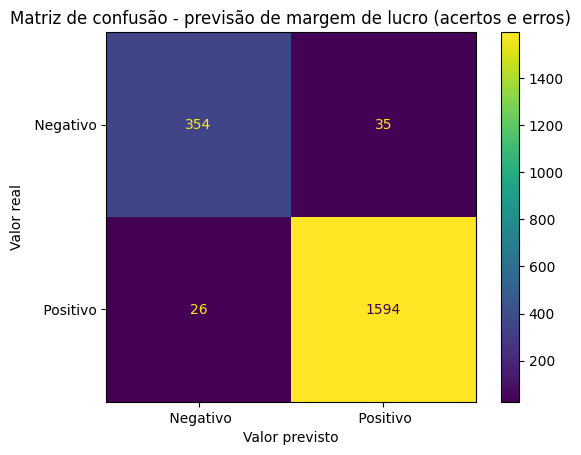

In [52]:
# Calculando acertos e erros do conjunto de validação

cm_norm_val = (confusion_matrix(model_predicts_val['Actual'] > 0, model_predicts_val['Predicted'] > 0, normalize='all'))

cm_val = confusion_matrix(model_predicts_val['Actual'] > 0, model_predicts_val['Predicted'] > 0)
precision_val = precision_score(model_predicts_val['Actual'] > 0, model_predicts_val['Predicted'] > 0)*100
cmd_val = ConfusionMatrixDisplay(confusion_matrix=cm_val, display_labels=[' Negativo', ' Positivo'])

# Plot da matriz de confusão
cmd_val.plot()
plt.title('Matriz de confusão - previsão de margem de lucro (acertos e erros)')
plt.xlabel('Valor previsto')
plt.ylabel('Valor real')

print(f'valores:\n{cm_val}')
print(f'valores normalizado:\n{cm_norm_val}')
plt.show()

In [53]:
print('Número total de amostras de validação:', len(model_predicts_val))
print('Percentual de margem de lucro negativas:', round((model_predicts_val.query('Actual < 0').Actual.count()/len(model_predicts_val))*100,2),'%')
print('Percentual de margem de lucro positivas:', round((model_predicts_val.query('Actual > 0').Actual.count()/len(model_predicts_val))*100,2),'%')
print(f'\nPrecisão: {precision_val:.2f} %')
print('Falsos Positivos:', cm_val[0][1])
print('Taxa de Falsos Positivos:', round(cm_norm_val[0][1]*100,2),'%')
print('Falsos Negativos:', cm_val[1][0])
print('Taxa de Falsos Negativos:', round(cm_norm_val[1][0]*100,2),'%')

Número total de amostras de validação: 2009
Percentual de margem de lucro negativas: 18.87 %
Percentual de margem de lucro positivas: 80.64 %

Precisão: 97.85 %
Falsos Positivos: 35
Taxa de Falsos Positivos: 1.74 %
Falsos Negativos: 26
Taxa de Falsos Negativos: 1.29 %


O modelo performou bem, apresentando alta precisão e baixas taxas de falsos positivos e falsos negativos, o que indica uma boa capacidade de prever corretamente tanto margens de lucro quanto evitar prejuízos.

### Teste
<a name="39"></a>
O conjunto de teste avalia a capacidade do modelo de generalizar para novos dados, testando-o em um dataset desconhecido. Ele funciona como uma confirmação de segurança dos resultados, verificando se o modelo está realmente livre de underfitting ou overfitting e garantindo um bom desempenho fora do ambiente controlado.

In [54]:
#----------TESTE----------

# Previsões no conjunto de teste
preds_test = pipe_model.predict(X_test)

# Métricas de desempenho
model_r2_test = r2_score(y_test, preds_test) # R²
model_r2_test_cv = cross_val_score(pipe_model, X_test, y_test, cv=5, scoring='r2') # Cross validation R²
model_mae_test = mean_absolute_error(y_test, preds_test) # MAE
model_mae_test_cv = -cross_val_score(pipe_model, X_test, y_test, cv=5, scoring='neg_mean_absolute_error') # Cross Validation MAE
model_rmse_test = np.sqrt(mean_squared_error(y_test, preds_test)) # RMSE
model_rmse_test_cv = -cross_val_score(pipe_model, X_test, y_test, cv=5, scoring='neg_root_mean_squared_error') # Cross Validation RMSE

# Variação Mínima da Previsão: É a previsão menos o erro médio absoluto do conjunto de VALIDAÇÃO
min_Predicted = preds_test - model_mae_val_cv.mean()

# Indicador de risco: Informa se a Variação Mínima da Previsão é igual ou superior a 5 % De margem de lucro.
risk_level = ['Seguro' if i >= 0.05 else 'Arriscado' for i in min_Predicted]

# DataFrame com previsões no teste
model_predicts_test = pd.DataFrame({
    'Actual': y_test,
    'Predicted': preds_test,
    'min_Predicted': min_Predicted,
    'Risk_Level': risk_level
})

model_predicts_test.head()

,Actual,Predicted,min_Predicted,Risk_Level
6360,0.16,0.14,0.08,Seguro
1254,0.35,0.35,0.29,Seguro
5120,0.11,0.11,0.06,Seguro
5471,0.00,0.02,-0.04,Arriscado
2991,0.19,0.20,0.14,Seguro


valores:
[[192   6]
 [ 49 743]]
valores normalizado:
[[0.19393939 0.00606061]
 [0.04949495 0.75050505]]


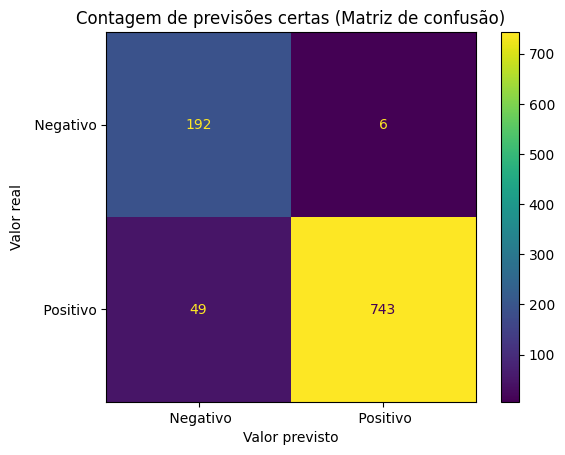

In [55]:
# Calculando acertos e erros do conjunto de teste

# Agora comparamos o valor atual com o valor mínimo previsto.
cm_norm_test = (confusion_matrix(model_predicts_test['Actual'] > 0, model_predicts_test['min_Predicted'] > 0, normalize='all'))

cm_test = confusion_matrix(model_predicts_test['Actual'] > 0, model_predicts_test['min_Predicted'] > 0)
precision_test = precision_score(model_predicts_test['Actual'] > 0, model_predicts_test['min_Predicted'] > 0)
cmd_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=[' Negativo', ' Positivo'])

# Plot da matriz de confusão
cmd_test.plot()
plt.title('Contagem de previsões certas (Matriz de confusão)')
plt.xlabel('Valor previsto')
plt.ylabel('Valor real')

print(f'valores:\n{cm_test}')
print(f'valores normalizado:\n{cm_norm_test}')
plt.show()

In [56]:
print('Número total de amostras de teste:', len(model_predicts_test))
print('Número total de amostras prejuízo:', model_predicts_test.query('Actual < 0').Actual.count())
print('Percentual de margem de lucro negativas:', round((model_predicts_test.query('Actual <= 0').Actual.count()/len(model_predicts_test))*100),'%')
print('Percentual de margem de lucro positivas:', round((model_predicts_test.query('Actual > 0').Actual.count()/len(model_predicts_test))*100),'%')
print(f'\nPrecisão: {round(precision_test*100,2)} %')
print('Falsos Positivos:', cm_test[0][1])
print('Taxa de Falsos Positivos:', round(cm_norm_test[0][1]*100,2),'%')
print('Falsos Negativos:', cm_test[1][0])
print('Taxa de Falsos Negativos:', round(cm_norm_test[1][0]*100,2),'%')

Número total de amostras de teste: 990
Número total de amostras prejuízo: 191
Percentual de margem de lucro negativas: 20 %
Percentual de margem de lucro positivas: 80 %

Precisão: 99.2 %
Falsos Positivos: 6
Taxa de Falsos Positivos: 0.61 %
Falsos Negativos: 49
Taxa de Falsos Negativos: 4.95 %


Comparado ao resultado anterior, o modelo atual apresenta uma precisão ligeiramente superior e taxas de falsos positivos muito menores, indicando um desempenho melhor na identificação de margens de lucro positivas e na minimização de prejuízos. No entanto, a taxa de falsos negativos é mais alta, sugerindo que o modelo atual perde mais oportunidades de lucro.

#### Indicador de Risco
<a name="40"></a>

Após o modelo gerar uma previsão, calcula-se a variação mínima com base na média do Erro Absoluto Médio (MAE) obtido na validação cruzada do conjunto de validação. A previsão é considerada confiável se essa variação mínima exceder um limiar de 5% da margem de lucro.

**MAE médio da validação cruzada** (conjunto de validação): 0.058

- O **MAE** é utilizado por ser uma métrica da mesma ordem de grandeza da variável alvo, o que facilita a interpretação dos erros de previsão. Além disso, por ser derivado do conjunto de validação, reflete o desempenho do modelo em novos dados, sendo uma aproximação prática em cenários reais, onde os erros futuros não podem ser conhecidos previamente. O RMSE (Root Mean Squared Error) poderia ser uma alternativa, fornecendo um critério mais conservador ao penalizar erros maiores de forma mais acentuada.

- O valor de **5% de margem mínima** foi definido como um critério para garantir a lucratividade das previsões. Esse limite foi estabelecido de maneira convencional, mas pode ser ajustado conforme as necessidades do negócio ou a tolerância ao risco.

In [57]:
# Verificando a classificação de risco que o modelo deu para os falsos positivos
model_predicts_test.query('min_Predicted > 0 and Actual <= 0')

,Actual,Predicted,min_Predicted,Risk_Level
1825,0.00,0.11,0.06,Seguro
4053,0.00,0.11,0.06,Seguro
9510,-0.20,0.09,0.03,Arriscado
1044,-0.14,0.07,0.02,Arriscado
8361,-0.11,0.06,0.00,Arriscado
3038,-0.04,0.09,0.03,Arriscado


In [58]:
# Verificando a classificação de risco que o modelo deu para os falsos positivos
model_predicts_test.query('min_Predicted <= 0 and Actual > 0')

,Actual,Predicted,min_Predicted,Risk_Level
6789,0.11,0.06,-0.00,Arriscado
8285,0.31,-0.05,-0.11,Arriscado
4528,0.04,0.04,-0.01,Arriscado
9728,0.05,0.05,-0.01,Arriscado
2288,0.01,0.01,-0.04,Arriscado
3785,0.04,-0.08,-0.14,Arriscado
65,0.02,0.00,-0.05,Arriscado
8781,0.05,-0.13,-0.18,Arriscado
4899,0.04,-0.08,-0.14,Arriscado
8556,0.29,0.03,-0.03,Arriscado


In [59]:
# Classificação de risco  falsos negativos (fora da regra inferior a 5%)
print(f"{model_predicts_test.query('min_Predicted <= 0 and Actual > 0').Risk_Level.value_counts()}")
print(f"Margem de lucro média das previsões descartadas (FN): {round(model_predicts_test.query('min_Predicted <= 0 and Actual > 0').Actual.mean()*100,2)}%")

# Frequencia dos falsos negativos
fig = px.histogram(model_predicts_test.query('min_Predicted <= 0 and Actual > 0').Actual,
                   title="Frequencia Margem de lucro falsos negativos (Previsões Lucrativas que seriam descartadas)")#.Risk_Level.value_counts()
fig.update_layout(
    xaxis_title='Margem real',
    yaxis_title='contagem',
    legend_title='variável',
)
fig.show()

Risk_Level
Arriscado    49
Name: count, dtype: int64
Margem de lucro média das previsões descartadas (FN): 9.75%


Das 6 classificações errôneas do modelo (falsos positivos), 4 delas foram consideradas arriscadas e seriam descartadas.

Apenas 2 previsões teriam potencial de gerar prejuízos Mas verificando vemos que a margem delas real era de 0 %, o que na prática significa que não haveria prejuízo.

Embora esse resultado sugira a ausência de perdas, não podemos concluir que o modelo eliminaria completamente prejuízos. No entanto, é possível observar que eventuais previsões incorretas tenderiam a gerar prejuízos muito reduzidos, devido ao mecanismo de classificação utilizado. Considerando o cenário atual, isso representa uma vantagem significativa, já que a empresa enfrenta margens de lucro negativas de até -275% no caso mais extremo.

#### Conclusão
<a name="41"></a>

O percentual de transações que geram prejuízos é de 19.29%, indicando que, no modelo de negócios atual, uma parte significativa das transações resulta em prejuízos financeiros. A implementação do modelo visa especificamente reduzir essa taxa, e a taxa de falsos positivos, que atualmente é de 0.61%, reflete a capacidade do modelo de minimizar previsões incorretas de lucro onde, na verdade, há prejuízo. A redução drástica na taxa de falsos positivos representa um avanço significativo no combate à geração de prejuízos, uma vez que o modelo é mais eficaz em identificar corretamente as transações lucrativas e evitar aquelas que efetivamente resultam em perdas. Com uma precisão de 99.2% e uma taxa de falsos negativos de 4.95%, a melhoria é crucial para reduzir o impacto financeiro negativo e aprimorar a eficiência do processo de decisão. No entanto, é importante considerar a obtenção de amostras adicionais para as categorias subamostradas, a fim de melhorar ainda mais a performance do modelo.

### Métricas de performance
<a name="42"></a>

In [60]:
# DataFrame do desempenho Validação e Teste

model_results = pd.DataFrame({
    'Validação': [
        model_r2_val,
        model_r2_val_cv.mean(),
        model_mae_val,
        model_mae_val_cv.mean(),
        model_rmse_val,
        model_rmse_val_cv.mean(),
    ],
    'Teste': [
        model_r2_test,
        model_r2_test_cv.mean(),
        model_mae_test,
        model_mae_test_cv.mean(),
        model_rmse_test,
        model_rmse_test_cv.mean(),
    ]
}, index=['R²', 'Cross Val R²', 'MAE', 'Cross Val MAE', 'RMSE', 'Cross Val RMSE'])

model_results
# print(model_results.to_markdown())

,Validação,Teste
R²,0.98,0.98
Cross Val R²,0.95,0.95
MAE,0.04,0.03
Cross Val MAE,0.06,0.06
RMSE,0.07,0.07
Cross Val RMSE,0.11,0.11


- **R² alto**: indica boa capacidade explicativa do modelo.
- **MAE e RMSE baixos**: indicam que as previsões são precisas e os erros são pequenos.
- **Validações Cruzadas**: confirmam a robustez e a consistência do modelo através de diferentes subconjuntos de dados.


## Consulta com o Modelo
<a name="43"></a>

O algoritmo de previsão certamente poderia ser usado em lote mas também apresento uma maneira de como ele poderia ser implementado para usuários  poderem fazer consultas individuais.

A proposta é uma interação é intuitiva e guiada de fácil utilização simulando uma utilização em um cenário real para garantir mais segurança nas decisões de precificação e aplicação de descontos.

Entrada de dados para realizar uma previsão:

1. Categoria (Seleção)
2. Subcategoria (Seleção)
3. Valor do produto (Inserir valor)
4. Valor do desconto (Inserir valor)

Saída do sistema:

* Margem de lucros estimada (Valor)
* Margem de lucro mínimo (Valor)
* Indicador de risco (Seguro ou arriscado)
* Resumo das entradas fornecidas para previsão


In [61]:
# Definindo as opções para categoria e subcategoria

categories = {
    1: 'Furniture',
    2: 'Office Supplies',
    3: 'Technology'
}

sub_categories = {
    'Furniture': ['Bookcases', 'Chairs', 'Tables', 'Furnishings'],
    'Office Supplies': ['Labels', 'Storage', 'Art', 'Binders', 'Appliances', 'Paper', 'Envelopes', 'Fasteners', 'Supplies'],
    'Technology': ['Phones', 'Accessories', 'Machines', 'Copiers']
}

In [62]:
# Função para mostrar opções e coletar escolha do usuário

def select_option(options):
    """Mostra opções e coleta a escolha do usuário, validando a entrada."""

    while True:
        print("Escolha uma opção:")
        for key, value in options.items():
            print(f"{key}. {value}")

        choice = input("Número da opção: ")

        if choice.isdigit() and int(choice) in options:
            return options[int(choice)]
        else:
            print("Opção inválida. Tente novamente.")  # Mensagem de erro

In [63]:
# Função que estima as previsões com base nos inputs do usuário
def predict_with_confidence(category, sub_category, product_value, discount):
    """Faz previsões da margem de lucro classifica o indicador risco."""

    # Criar um DataFrame com os dados de entrada
    input_data = pd.DataFrame([[category, sub_category, product_value, discount]],
                              columns=['Category', 'Sub_Category', 'Product_Value', 'Discount'])

    # Usar o modelo treinado para fazer previsões
    preds_new = pipe_model.predict(input_data)

    # RISCO
    min_Predicted = preds_new - model_mae_val_cv.mean()
    risk_level = ['Seguro' if i >= 0.05 else 'Arriscado' for i in min_Predicted]

    output = pd.DataFrame({
        'Margem de Lucro Prevista': f'{(preds_new[0] * 100).round(2)} %',
        'Margem de Lucro Mínima': f'{(min_Predicted[0] * 100).round(2)} %',
        'Risco': risk_level,
        '':[''],
        'DETALHES DA CONSULTA': [''],
        'Valor do Produto': [f'$ {product_value}'],
        'Desconto Aplicado': [f'{discount * 100:.1f} %'],
        'Categoria': [category],
        'Sub-categoria': [sub_category],
    })
    output = output.T
    output.index.name = 'PREVISÃO DE LUCRO E RISCO'
    output.columns = ['VALOR']
    print('\n')
    print(output.to_markdown())
    print('\n* Previsões de margem de lucro mínima inferiores a 5% \nsão classificadas como arriscadas.')

In [64]:
# Função principal
def estimar_margem_lucro():
    """Função principal para coletar inputs e fazer previsões.
    para usar basta executar "estimar_margem_lucro()" em uma célula."""

    # Coletar a categoria do usuário
    category = select_option(categories)
    print(f'Categoria selecionada: {category}\n')

    # Coletar a subcategoria do usuário baseada na categoria selecionada
    sub_category_options = sub_categories[category]
    sub_category = select_option({idx + 1: sub for idx, sub in enumerate(sub_category_options)})
    print(f'Subcategoria selecionada: {sub_category}\n')

    # Coletar o valor do produto e o percentual de desconto do usuário
    product_value = float(input("Insira o valor do produto: "))
    discount = (float(input("Insira o percentual de desconto (0 à 99): ")))/100

    # Fazer a previsão e mostrar o resultado
    predict_with_confidence(category, sub_category, product_value, discount)


O modelo foi treinado somente com os conjuntos:

- X_train e y_train.

O modelo foi testado com os conjuntos:

- X_val e y_val
- X_test e y_test

Sendo assim os conjuntos De teste São desconhecidos para o modelo. Utilizaremos amostras Destes conjuntos Para verificar o valor da previsão e o valor real.

In [65]:
# Testando o modelo preditivo com um produto que gerou 10 % de margem de lucro real.
print(X_test.iloc[22])
print(f'margem de lucro real:{round(y_test.iloc[22]*100,2)} %')

Category         Furniture
Sub_Category        Chairs
Discount              0.20
Product_Value       195.18
Name: 4961, dtype: object
margem de lucro real:10.0 %


In [66]:
estimar_margem_lucro()

Escolha uma opção:
1. Furniture
2. Office Supplies
3. Technology
Número da opção: 1
Categoria selecionada: Furniture

Escolha uma opção:
1. Bookcases
2. Chairs
3. Tables
4. Furnishings
Número da opção: 2
Subcategoria selecionada: Chairs

Insira o valor do produto: 195.18
Insira o percentual de desconto (0 à 99): 20


| PREVISÃO DE LUCRO E RISCO   | VALOR     |
|:----------------------------|:----------|
| Margem de Lucro Prevista    | 12.44 %   |
| Margem de Lucro Mínima      | 6.66 %    |
| Risco                       | Seguro    |
|                             |           |
| DETALHES DA CONSULTA        |           |
| Valor do Produto            | $ 195.18  |
| Desconto Aplicado           | 20.0 %    |
| Categoria                   | Furniture |
| Sub-categoria               | Chairs    |

* Previsões de margem de lucro mínima inferiores a 5% 
são classificadas como arriscadas.


"Chairs" foi a subcategoria que o modelo menos identificou o padrão  de acordo com a feature importance. apesar disso:

- Fez uma previsão correta: Estimou um valor positivo.
- Sinalizou corretamente como "Seguro".

In [67]:
# Testando o modelo preditivo com um produto que gerou -86 % de margem de lucro real (Prejuízo).
print(X_test.iloc[23])
print(f'margem de lucro real:{round(y_test.iloc[23]*100,2)} %')

Category         Furniture
Sub_Category        Tables
Discount              0.50
Product_Value       208.70
Name: 5821, dtype: object
margem de lucro real:-86.0 %


In [68]:
estimar_margem_lucro()

Escolha uma opção:
1. Furniture
2. Office Supplies
3. Technology
Número da opção: 1
Categoria selecionada: Furniture

Escolha uma opção:
1. Bookcases
2. Chairs
3. Tables
4. Furnishings
Número da opção: 3
Subcategoria selecionada: Tables

Insira o valor do produto: 208.70
Insira o percentual de desconto (0 à 99): 50


| PREVISÃO DE LUCRO E RISCO   | VALOR     |
|:----------------------------|:----------|
| Margem de Lucro Prevista    | -58.25 %  |
| Margem de Lucro Mínima      | -64.03 %  |
| Risco                       | Arriscado |
|                             |           |
| DETALHES DA CONSULTA        |           |
| Valor do Produto            | $ 208.7   |
| Desconto Aplicado           | 50.0 %    |
| Categoria                   | Furniture |
| Sub-categoria               | Tables    |

* Previsões de margem de lucro mínima inferiores a 5% 
são classificadas como arriscadas.


"Tables" é uma sub-categoria que teve poucas amostras para treinamento. Apesar disso o modelo fez uma previsão correta:

- Estimou uma margem de lucro negativa.
- Sinalizou como "arriscado".

# Impacto da implementação do algoritmo
<a name="44"></a>

Para calcular o impacto da implementação do algoritmo na redução dos prejuízos, seguimos os seguintes passos:

1. **Estimativas de Prejuízo e Transações para 2018**:
   - Estimamos o prejuízo total e o número de transações que gerariam prejuízo no ano seguinte, com base no crescimento médio histórico.
   - Utilizamos o desvio padrão para criar um intervalo de confiança para essas estimativas.

2. **Cálculo do Prejuízo Médio por Transação**:
   - A partir das estimativas, derivamos o valor do prejuízo médio por transação.

3. **Cálculo do Prejuízo Reduzido**:
   - Com as estimativas do número de transações e do valor do prejuízo correspondente, calculamos o prejuízo reduzido.
   - Aplicamos a eficiência prevista pelo modelo, definida pela precisão ao utilizar o indicador de risco, para estimar o número de transações com prejuízo reduzido e o valor correspondente.

Esses cálculos permitem quantificar o impacto potencial do algoritmo na redução dos prejuízos, considerando tanto o número de transações quanto o valor médio de cada prejuízo.

**Precisão do modelo com indicador de risco**: 99.7%

In [69]:
# Executando calculos em dados pretéritos para comparação e análise.

# Média de prejuízo por transação
avg_loss_per_transactions_Y = loss_Y / loss_transactions_Y

# Número reduzido de transações com prejuízo (Utilizando o algoritmo)
loss_transactions_Y_reduced = loss_transactions_Y - (loss_transactions_Y * (precision_test))

# Prejuízo reduzido com o algoritmo (dada a média de prejuízo por transação)
loss_Y_reduced = loss_transactions_Y_reduced * avg_loss_per_transactions_Y

# Valor poupado
saved_value = loss_Y - loss_Y_reduced

algo_impact = pd.concat([loss_transactions_Y, loss_Y, avg_loss_per_transactions_Y, loss_transactions_Y_reduced, loss_Y_reduced, saved_value],axis=1)
algo_impact.columns = ['# Transações Prejuízo', 'Prejuízo Total', 'Prejuízo Médio por Transação','# Transações Prejuízo (Reduzido)', ' Prejuízo Total (Reduzido)', 'Valor Poupado']
algo_impact.index = list(range(2014,2018))
algo_impact.index.name = 'Ano'
algo_impact.reset_index(inplace=True,drop=False)
algo_impact.T

,0,1,2,3
Ano,"2,014.00","2,015.00","2,016.00","2,017.00"
# Transações Prejuízo,394.00,406.00,497.00,639.00
Prejuízo Total,"-31,892.77","-32,529.39","-37,872.93","-53,836.19"
Prejuízo Médio por Transação,-80.95,-80.12,-76.20,-84.25
# Transações Prejuízo (Reduzido),3.16,3.25,3.98,5.12
Prejuízo Total (Reduzido),-255.48,-260.58,-303.39,-431.26
Valor Poupado,"-31,637.29","-32,268.81","-37,569.54","-53,404.93"


## Como o algoritmo pode impactar no futuro
<a name="45"></a>

In [70]:
# Estimativa do Prejuízo para 2018 e Prejuízo Reduzido com o Modelo Preditivo

# Calculando intervalos baseados no desvio padrão das mudanças percentuais
loss_transactions_std = loss_transactions_Y.pct_change().std()
loss_std = loss_Y.pct_change().std()

# Projetando o número estimado de transações com prejuízo para 2018 baseado na média do crescimento ano a ano e calculando a variação máxima e mínima de acordo com o desvio padrão.
loss_transactions_2018 = loss_transactions_Y['2017-01-01'] + (loss_transactions_Y['2017-01-01']  * loss_transactions_Y.pct_change().mean())
loss_transactions_2018_max = loss_transactions_2018 + (loss_transactions_2018 * loss_transactions_std)
loss_transactions_2018_min = loss_transactions_2018 - (loss_transactions_2018 * loss_transactions_std)

# Projetando o prejuízo estimado 2018 baseado na média de crescimento do prejuízo ano a ano  e calculando a variação máxima e mínima de acordo com o desvio padrão.
loss_2018 = loss_Y['2017-01-01'] + (loss_Y['2017-01-01']  * loss_Y.pct_change().mean())
loss_2018_max = loss_2018 + (loss_2018 * loss_std)
loss_2018_min = loss_2018 - (loss_2018 * loss_std)

# Calculando a média de prejuízo por transação com as projeções
avg_loss_per_transactions_2018 = loss_2018 / loss_transactions_2018
avg_loss_per_transactions_2018_max = loss_2018_max / loss_transactions_2018_max
avg_loss_per_transactions_2018_min = loss_2018_min / loss_transactions_2018_min

# Número reduzido de transações com prejuízo para 2018 (Utilizando o algoritmo)
loss_transactions_2018_reduced = loss_transactions_2018 - (loss_transactions_2018 * precision_test)
loss_transactions_2018_reduced_max = loss_transactions_2018_max - (loss_transactions_2018_max * precision_test)
loss_transactions_2018_reduced_min = loss_transactions_2018_min - (loss_transactions_2018_min * precision_test)

# Prejuízo reduzido com o algoritmo para 2018 (dada a média de prejuízo por transação)
loss_2018_reduced = loss_transactions_2018_reduced * avg_loss_per_transactions_2018
loss_2018_reduced_max = loss_transactions_2018_reduced_max * avg_loss_per_transactions_2018_max
loss_2018_reduced_min = loss_transactions_2018_reduced_min * avg_loss_per_transactions_2018_min

# Valor poupado
saved_value_2018 = loss_2018 - loss_2018_reduced
saved_value_2018_max = loss_2018_max - loss_2018_reduced_max
saved_value_2018_min = loss_2018_min - loss_2018_reduced_min

# Criando as séries com as projeções para 2018
pred_2018_values_min = ['Mínima', loss_transactions_2018_min, loss_2018_min, avg_loss_per_transactions_2018_min.round(2), loss_transactions_2018_reduced_min, loss_2018_reduced_min, saved_value_2018_min]
pred_2018_values_mean = ['Média', loss_transactions_2018, loss_2018, avg_loss_per_transactions_2018.round(2), loss_transactions_2018_reduced, loss_2018_reduced, saved_value_2018]
pred_2018_values_max = ['Máxima', loss_transactions_2018_max, loss_2018_max, avg_loss_per_transactions_2018_max.round(2), loss_transactions_2018_reduced_max, loss_2018_reduced_max, saved_value_2018_max]

# Criando o DataFrame com as estimativas para 2018
algo_impact_2018 = pd.DataFrame([pred_2018_values_min, pred_2018_values_mean, pred_2018_values_max])
algo_impact_2018.columns = algo_impact.columns
algo_impact_2018.set_index('Ano',inplace=True)
algo_impact_2018.index.name = 'Estimativas 2018'
print('Estimativa do Prejuízo para 2018 e Prejuízo Reduzido com o Modelo Preditivo')
algo_impact_2018.T

Estimativa do Prejuízo para 2018 e Prejuízo Reduzido com o Modelo Preditivo


Estimativas 2018,Mínima,Média,Máxima
# Transações Prejuízo,653.64,754.09,854.53
Prejuízo Total,"-51,545.18","-64,706.16","-77,867.15"
Prejuízo Médio por Transação,-78.86,-85.81,-91.12
# Transações Prejuízo (Reduzido),5.24,6.04,6.85
Prejuízo Total (Reduzido),-412.91,-518.34,-623.77
Valor Poupado,"-51,132.27","-64,187.82","-77,243.38"


In [71]:
# Visualizando as projeções para 2018

# Criando os intervalos
loss_2018_reduced_bound = loss_2018_reduced_max - loss_2018_reduced
loss_2018_bound = loss_2018 * loss_std
saved_value_2018_bound = saved_value_2018 - saved_value_2018_min

fig = go.Figure()

fig.add_trace(go.Bar(
    name='Prejuízo Estimado',
    x=[loss_2018],
    error_x=dict(type='data', array=[loss_2018_bound, -loss_2018_bound]),
    orientation='h',
))

fig.add_trace(go.Bar(
    name='Prejuízo Estimado Reduzido',
    x=[loss_2018_reduced],
    error_x=dict(type='data', array=[loss_2018_reduced_bound, -loss_2018_reduced_bound]),
    orientation='h',
))

fig.add_trace(go.Bar(
    name='Valor Poupado',
    x=[-saved_value_2018],
    error_x=dict(type='data', array=[saved_value_2018_bound, -saved_value_2018_bound]),
    orientation='h',
))

fig.update_layout(
    barmode='group',
    title='Estimativa do Prejuízo para 2018 e Prejuízo Reduzido com o Modelo Preditivo',
    yaxis_title='2018',
    xaxis_title='Valor (em unidades monetárias)',
    legend_title='Categoria',
    xaxis=dict(tickformat=",.2f"),
    showlegend=True
)

fig.update_layout(barmode='group')
fig.show()

# Planejamento e Validação de Experimentos
<a name="46"></a>

> Não é incomum que modelos de Machine Learning apresentem resultados promissores em ambientes de teste, mas percam significativamente em performance quando implementados em produção.

Por esse motivo, é essencial realizar um experimento para verificar o desempenho do modelo em um ambiente de produção antes de sua implementação definitiva.

O experimento utilizado será o **Teste Randomizado Controlado (RCT)**, que, de forma resumida, funciona comparando dois grupos de amostras. O **grupo de controle** serve como referência para a proporção atual de transações que geram prejuízo, enquanto o **grupo de teste** recebe o "tratamento", que, neste caso, é o modelo preditivo. Ao final, um teste estatístico é realizado para verificar se a diferença entre os resultados dos dois grupos é estatisticamente significativa ou se poderia ocorrer por mero acaso.

> O Teste Randomizado Controlado (RCT) é considerado o padrão ouro em termos de nível de evidência na pesquisa científica, incluindo nas áreas de saúde, psicologia, economia, e ciência de dados. Ele fornece um nível de evidência "Nível I", que é o mais alto nível de evidência para estudos experimentais.

### Etapas do Experimento:

1. **Determinar o Tamanho Necessário das Amostras:**
   - Calcular o tamanho mínimo de amostras necessário para que o experimento tenha validade estatística, garantindo poder suficiente para detectar um efeito mínimo relevante.

2. **Realizar uma Amostragem Randomizada Estratificada Proporcional:**
   - As amostras devem ser representativas, contendo todas as subcategorias de produtos de forma proporcional, para assegurar que o experimento reflete a diversidade de cenários presentes no ambiente de produção.

3. **Definir os Parâmetros do Teste e o Tamanho das Amostras:**
   - Determinar o nível de significância (por exemplo, 0,05), o poder do teste (por exemplo 0,95 ou 95%), e o efeito mínimo detectável, assegurando que o teste seja sensível o suficiente para identificar diferenças significativas.

4. **Executar um Teste Estatístico Comparativo:**
   - Realizar um teste estatístico apropriado (no caso o Teste de Fisher) para comparar os resultados entre os grupos de controle e de teste, avaliando se a diferença observada é estatisticamente significativa e relevante do ponto de vista prático.

5. **Informar os Resultados Obtidos:**
   - Apresentar os resultados do experimento, incluindo a análise de significância estatística, a interpretação dos dados coletados e a conclusão sobre a efetividade do modelo em ambiente de produção. Se H0 for rejeitada, o modelo é considerado eficaz; caso contrário, ajustes adicionais ou reavaliação do modelo podem ser necessários.


## Cálculo da Amostra para RCT (Randomized Controlled Trial)
<a name="47"></a>

Para calcular o tamanho da amostra necessário para um experimento, como um experimento controlado randomizado (RCT), precisamos considerar alguns fatores:

- **Nível de significância (α)**: A probabilidade de rejeitar a hipótese nula quando ela é verdadeira (erro tipo I). Normalmente, é 0.05 (para 95%).

- **Poder do teste (1 - β)**: A probabilidade de detectar um efeito se houver um (erro tipo II). Normalmente, é 0.9 ou 0.95 (90% ou 95%).

- **Tamanho do efeito (d)**: A diferença mínima que você deseja detectar entre os grupos. Pode ser especificado em termos de desvio padrão ou, para proporções, a diferença mínima entre as proporções.

- **proporção de eventos no grupo de controle (p1)**: Proporção de ocorrências esperada no grupo de controle.

- **proporção de eventos no grupo de teste (p2)**: Proporção de ocorrências esperada no grupo de Teste.

- **Efeito mínimo detectável (p1-p2)**: "Minimum Detectable Effect (MDE)".(p1-p2) é uma abordagem comum e geralmente apropriada quando o objetivo é detectar uma diferença específica entre dois grupos em termos de proporções. No contexto de um experimento que contabiliza a ocorrência de eventos binários (por exemplo, lucro ou prejuízo), essa diferença absoluta é frequentemente usada para expressar o MDE.

Formula para calcular o tamanho das amostras:

$$
n = \frac{(p_1 - p_2)^2 \cdot (Z_{\alpha/2} + Z_{\beta})^2}{p_1(1 - p_1) + p_2(1 - p_2)}
$$


In [72]:
# Função para calculo do tamanho de amostra necessário para para grupo de controle e teste do RCT.

def RCT_sample_size(stat_significance, test_power, p1, p2):
    """
    Calcula o tamanho de amostra necessário para um experimento controlado randomizado (RCT) e retorna informações detalhadas.

    Parâmetros:
    - stat_significance (float): Nível de significância desejado (e.g., 0.05 para 95%).
    - test_power (float): Poder do teste desejado (e.g., 0.8 para 80%).
    - p1 (float): Proporção de eventos no grupo de controle.
    - p2 (float): Proporção de eventos no grupo de teste.

    Retorna:
    - result (dict): Dicionário contendo o tamanho da amostra necessário e os parâmetros utilizados.
    """

    # Cálculo do efeito mínimo detectável (mínima diferença entre proporções)
    min_detectable_effect = abs(p1 - p2)

    # Z-score para o nível de significância (Z_alpha) e para o poder do teste (Z_beta)
    Z_alpha = norm.ppf(1 - stat_significance / 2)  # para um teste bicaudal
    Z_beta = norm.ppf(test_power)

    # Proporção combinada
    pooled_prob = (p1 + p2) / 2

    # Cálculo do tamanho da amostra
    n = ((Z_alpha * math.sqrt(2 * pooled_prob * (1 - pooled_prob)) +
          Z_beta * math.sqrt(p1 * (1 - p1) + p2 * (1 - p2))) ** 2) / min_detectable_effect ** 2

    n = math.ceil(n)  # arredonda para cima para garantir tamanho de amostra suficiente

    # Dicionário de resultados detalhados
    result = {
        "Tamanho de amostra necessário em cada grupo": n,
        "Significância estatística": stat_significance,
        "Poder do teste": test_power,
        "Proporção de eventos no grupo de controle": p1,
        "Proporção de eventos no grupo de teste": p2,
        "Efeito mínimo detectável": min_detectable_effect
    }
    result = pd.DataFrame(result, index=[0])
    result = result.T
    result.columns = ['Valor']
    result.index.name = 'RCT - Resultados'
    print(result.to_markdown())

In [73]:
RCT_sample_size(stat_significance=.05, test_power=.95, p1=.19, p2=.0061)

| RCT - Resultados                            |   Valor |
|:--------------------------------------------|--------:|
| Tamanho de amostra necessário em cada grupo | 65      |
| Significância estatística                   |  0.05   |
| Poder do teste                              |  0.95   |
| Proporção de eventos no grupo de controle   |  0.19   |
| Proporção de eventos no grupo de teste      |  0.0061 |
| Efeito mínimo detectável                    |  0.1839 |


## Análise Estatística dos Resultados
<a name="48"></a>

Para validação estatística do modelo testado precisamos realizar um teste de hipotese.

### Hipótese Nula (H0):
A **Hipótese Nula (H0)** assume que não há diferença significativa entre o grupo de controle e o grupo de teste — ou seja, o uso do modelo preditivo não altera a proporção de transações que geram prejuízo em comparação com o cenário atual. Se os resultados do teste estatístico indicarem que a diferença observada é suficientemente improvável de ocorrer ao acaso (abaixo de um determinado nível de significância), rejeitamos a H0, concluindo que o modelo tem um impacto real em produção.

### Teste de Fisher:
Adequado para dados de contagem, que comparam proporções ou frequências entre grupos, como no caso tratado, número de transações com e sem prejuízo (mais apropriado que o teste qui-quadrado pelo fato do tamanho da amostra e do numero de ocorrencias ser baixo).

In [74]:
def Fisher_test(sample_size, n_control, n_test, alpha=0.05):
    """
    Realiza o Teste Exato de Fisher e retorna o p-valor, se aceita ou rejeita a hipótese nula (H0)
    e a conclusão.

    Parâmetros:
    - sample_size (int): Tamanho total da amostra para cada grupo (controle e teste).
    - n_control (int): Número de eventos no grupo de controle.
    - n_test (int): Número de eventos no grupo de teste.
    - alpha (float, opcional): Nível de significância desejado (default é 0.05 para 95% de confiança).

    Retorna:
    - result (dict): Dicionário contendo o p-valor, decisão sobre H0 e a conclusão.
    """

    # Calcula os números de não-eventos (ausência de eventos) para controle e teste
    non_event_control = sample_size - n_control
    non_event_test = sample_size - n_test

    # Cria a tabela de contingência para o teste
    contingency_table = [[n_control, non_event_control], [n_test, non_event_test]]

    # Realiza o Teste Exato de Fisher
    _, p_value = fisher_exact(contingency_table, alternative='two-sided')

    # Decisão sobre a hipótese nula
    if p_value < alpha:
        decision = "Rejeita H0"
        conclusion = "Há evidência estatística suficiente que comprove a diferença entre as amostras."
    else:
        decision = "Aceita H0"
        conclusion = "Não há evidência estatística suficiente que comprove a diferença entre as amostras."

    # Dicionário de resultados
    result = {
            "Tamanho da amostra por grupo": sample_size,
            "Número de eventos no grupo de controle": n_control,
            "Número de eventos no grupo de teste": n_test,
            "p-valor": p_value,
            "Decisão sobre H0": decision,
            "Conclusão": conclusion
            }

    # return result
    result = pd.DataFrame(result, index=[0])
    result = result.T
    result.columns = ['Valor']
    result.index.name = 'Teste de Fisher - Resultados'
    print(result.to_markdown())

In [75]:
# Simulando resultados 1
Fisher_test(sample_size=65, n_control=11, n_test=2, alpha=0.05)

| Teste de Fisher - Resultados           | Valor                                                                           |
|:---------------------------------------|:--------------------------------------------------------------------------------|
| Tamanho da amostra por grupo           | 65                                                                              |
| Número de eventos no grupo de controle | 11                                                                              |
| Número de eventos no grupo de teste    | 2                                                                               |
| p-valor                                | 0.016360965683673175                                                            |
| Decisão sobre H0                       | Rejeita H0                                                                      |
| Conclusão                              | Há evidência estatística suficiente que comprove a diferença entre as amostras. |


In [76]:
# Simulando resultados 2
Fisher_test(sample_size=65, n_control=10, n_test=3, alpha=0.05)

| Teste de Fisher - Resultados           | Valor                                                                               |
|:---------------------------------------|:------------------------------------------------------------------------------------|
| Tamanho da amostra por grupo           | 65                                                                                  |
| Número de eventos no grupo de controle | 10                                                                                  |
| Número de eventos no grupo de teste    | 3                                                                                   |
| p-valor                                | 0.07614289518283325                                                                 |
| Decisão sobre H0                       | Aceita H0                                                                           |
| Conclusão                              | Não há evidência estatística suficiente que comprove a

# Conclusão

## Conclusão

Este projeto teve como objetivo mitigar os prejuízos financeiros causados por descontos excessivos em produtos no e-commerce "Superstore". Após uma análise detalhada dos dados de vendas e a identificação de problemas associados à formulação de preços, desenvolvemos um modelo preditivo de Machine Learning para estimar a margem de lucro dos produtos antes de serem anunciados na plataforma.

### Principais Conclusões

1. **Análise dos Dados**:
   - Identificamos padrões e anomalias nos dados de vendas que estavam contribuindo para os prejuízos. A análise revelou que descontos excessivos eram uma causa significativa dos prejuízos financeiros.

2. **Modelo Preditivo**:
   - Desenvolvemos e treinamos um modelo preditivo que estima a margem de lucro com base em variáveis como preço, desconto, categoria e região. Os testes mostraram que o modelo é capaz de reduzir em até 96,8% o número de transações que resultam em prejuízo.

3. **Validação e Teste**:
   - O modelo foi avaliado quanto à sua precisão e capacidade preditiva usando métricas como erro médio absoluto (MAE), erro quadrático médio (RMSE) e R², além de métricas de avaliação classificatória. Os resultados foram robustos e confiáveis, confirmando a eficácia do modelo em prever transações lucrativas e prejudiciais.

4. **Experimento Controlado Randomizado (RCT)**:
   - Realizamos um planejamento para um experimento controlado que validará o modelo em um ambiente de produção. O Teste Randomizado Controlado (RCT) será implementado para garantir que o modelo funcione de maneira eficaz e que as conclusões obtidas sejam estatisticamente significativas.

5. **Validação Estatística**:
   - Aplicamos o Teste de Fisher para confirmar a significância estatística das diferenças entre as transações com e sem a aplicação do modelo. Os resultados indicam que o modelo tem um impacto positivo significativo na redução de prejuízos.

### Recomendação

Recomendamos a implementação do modelo preditivo em um ambiente de produção controlado, com monitoramento contínuo para ajustes futuros com base em novos dados e feedback. A aplicação do modelo deve contribuir significativamente para a melhoria da rentabilidade da empresa, minimizando as transações que geram prejuízos.

### Próximos Passos

- **Implementação**: Integrar o modelo ao sistema de gestão de preços do e-commerce e acompanhar o desempenho em tempo real.
- **Monitoramento e Ajustes**: Realizar uma revisão periódica do modelo para garantir que continue a atender aos objetivos de redução de prejuízos.
- **Exploração de Melhorias**: Explorar possíveis melhorias no modelo, incluindo a incorporação de novas variáveis e técnicas avançadas de Machine Learning.

Com a adoção destas recomendações, a empresa poderá otimizar suas estratégias de precificação e promover um aumento na lucratividade, alinhando-se melhor com as melhores práticas de gestão de preços e marketing.


# Fim
<a name="46"></a>
Obrigado!